> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
This database includes their budget, revenue, cast, director, rating, genres and more.
and we will use this data set to answer certain questions.
The questions we will answer will be:
1 - which movie gain the highest popularity ?
2 - which movie makes the largest and the movie with smallest revenue ?
3 - which genres achieve the hightest and lowest votes ?
4 - which movie achieves highest revenue according to revenue_adj ?
5 - what are the best films that have an average vote above 8 ?
6 - what are the worst films that have an average vote below 4 ?
7 - what is popularity for first 25 movies ?
8 - How the runtime affects on the popularity ?
9 - How the runtime affects on the revenue ?
10 - which company achieves the highest revenue ?


In [44]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [45]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [46]:
# information about the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [47]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [48]:
# fix duplicate data
# check for duplicated data
df['id'].duplicated().sum()

1

In [49]:
# drop duplicated data
df.drop_duplicates(inplace=True)

In [50]:
# check for nulls
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [51]:
#drop nulls
df.dropna(inplace=True)

In [52]:
# check my dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
id                      1992 non-null int64
imdb_id                 1992 non-null object
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
homepage                1992 non-null object
director                1992 non-null object
tagline                 1992 non-null object
keywords                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null object
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-null flo

In [53]:
# convert object to string
lst_of_columns = ['original_title' , 'cast' ,'homepage' , 'director' , 'tagline' ,'keywords', 'overview' , 'genres' , 'production_companies']
df[lst_of_columns].apply(lambda x : str(x).split('|'))


original_title          [0                               Jurassic Worl...
cast                    [0        Chris Pratt, Bryce Dallas Howard, Ir...
homepage                [0                            http://www.juras...
director                [0                                Colin Trevor...
tagline                 [0                                        The ...
keywords                [0        monster, dna, tyrannosaurus rex, vel...
overview                [0        Twenty-two years after the events of...
genres                  [0                Action, Adventure, Science F...
production_companies    [0        Universal Studios, Amblin Entertainm...
dtype: object

In [54]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (which movie gain the highest popularity ?)

In [55]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [56]:
# extract movie name and popularity
movie_pop = df[['original_title','popularity']]

In [57]:
# get the maximun popularity
max = movie_pop['popularity'].max()

In [58]:
# get the name of the movie with the highest popularity and print it
dfff = movie_pop[movie_pop['popularity'] == max ]
print('The Movie with highest popularity is :')
dfff['original_title'][0]

The Movie with highest popularity is :


'Jurassic World'

### Research Question 2  (which movie makes the largest and the movie with smallest revenue ?)

In [59]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [60]:
# extract movie names and their revenue
movie_revenue = df[['original_title','revenue']]

In [61]:
# get the maximum and minimun revenues
max_rev = movie_revenue['revenue'].max()
min_rev = movie_revenue['revenue'].min()


In [62]:
# get the movies that makes the highest and lowest revenues and print them
maxMovie = movie_revenue[movie_revenue['revenue'] == max_rev ]
minMovie = movie_revenue[movie_revenue['revenue'] == min_rev ]

print('The film with the highest revenue is\n',maxMovie)
print('************************************************')
print('The film with the lowest revenue is\n',minMovie)

The film with the highest revenue is
      original_title     revenue
1386         Avatar  2781505847
************************************************
The film with the lowest revenue is
                                           original_title  revenue
67                                              Survivor        0
75                        Me and Earl and the Dying Girl        0
143                                 Brothers of the Wind        0
159                                            Kung Fury        0
174                                      Jenny's Wedding        0
181    LEGO DC Comics Super Heroes: Justice League vs...        0
187                                      Into the Forest        0
197                                           The Hallow        0
201                                               Man Up        0
212                                       Knight of Cups        0
214                                    Mississippi Grind        0
215                 

### Research Question 3  (which genres achieve the hightest and lowest votes ?)

In [63]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [64]:
#df_genres_votes['genres'].apply(lambda x : str(x).split('|'))
#df_genres_votes.head()

In [65]:
# extract genres and their votes
df_genres_votes = df[['genres' , 'vote_count']]
#get the minimun and maximun votes for genre column
max = df_genres_votes.vote_count.max()
min = df_genres_votes.vote_count.min()

In [66]:
#get the gernres associated with max and min and print them
g_max = df_genres_votes[df_genres_votes['vote_count'] == max]
g_min = df_genres_votes[df_genres_votes['vote_count'] == min]
print('The genre that achieves the highest revenue is ' , g_max)
print('********************************************************')
print('The genre that achieves the lowest revenue is \n' , g_min)

The genre that achieves the highest revenue is                                                   genres  vote_count
1919  Action|Thriller|Science Fiction|Mystery|Adventure        9767
********************************************************
The genre that achieves the lowest revenue is 
                                            genres  vote_count
1014                              Thriller|Horror          10
1120                                  Music|Drama          10
1560                        Drama|Foreign|Mystery          10
2188                       Drama|Thriller|Foreign          10
2319                               Comedy|Romance          10
2349                          Documentary|History          10
2358                                        Drama          10
2375                               Comedy|Romance          10
3120                           Action|Crime|Drama          10
3366                           Documentary|Family          10
3724                         

### Research Question 4  (which movie achieves highest revenue according to revenue_adj ?)

In [67]:
# get the max revenue_adj and print movie associated with it
max = df['revenue_adj'].max()
print(df.original_title[ df.revenue_adj == max])


1386    Avatar
Name: original_title, dtype: object


Compare with Movie achieved highest revenue above

In [68]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Research Question 5  (what are the best films that have an average vote above 8?)

In [69]:
# query all movies that have a rating avove 8 and print them
movies = df.query('vote_average > 8')
print(movies.original_title)
movies.shape

650                                Whiplash
2389               Bill Cunningham New York
2409                             Fight Club
2875                        The Dark Knight
3826     Kill Bill: The Whole Bloody Affair
7269                          The Godfather
10222                      Schindler's List
Name: original_title, dtype: object


(7, 21)

# compare the revenue of best movies


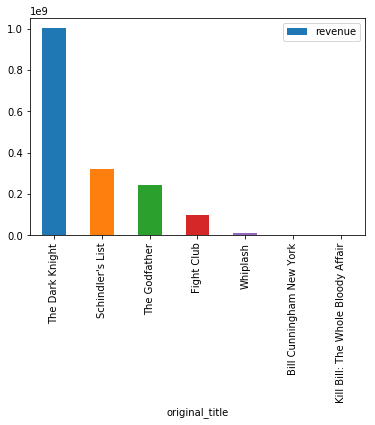

In [70]:
 movies[['original_title' , 'revenue']].sort_values(by='revenue', ascending=False).iloc[:10].plot(x='original_title',y='revenue',kind='bar')

we notice that It's not always the best movies has the highest budget

### Research Question 6  (what are the worst films that have an average vote below 4 ?)

In [71]:
# query all movies that have a rating below 4 and print them
movies_min = df.query('vote_average < 4')
print(movies_min.original_title)
movies.shape

102                    The Boy Next Door
481                                Bound
682                          Left Behind
810                               Zodiac
975                      Best Night Ever
1205               Jersey Shore Massacre
1289                           Treehouse
1773    ZMD: Zombies of Mass Destruction
2076             Nude Nuns With Big Guns
2280          Mega Shark vs. Crocosaurus
2325                        Mega Piranha
3134                      Disaster Movie
3489               Battle of Los Angeles
4621                  Outpost: Black Sun
4708               2-Headed Shark Attack
4851                            Playback
4859                          Foodfight!
4868                       Among Friends
5064                               Gigli
5082                   House of the Dead
5689                           Sharknado
5978                           Nailbiter
6315                          BloodRayne
6404                      All About Anna
6423            

(7, 21)

### Research Question 7  (what are the top 25 movie that have popularity ?)

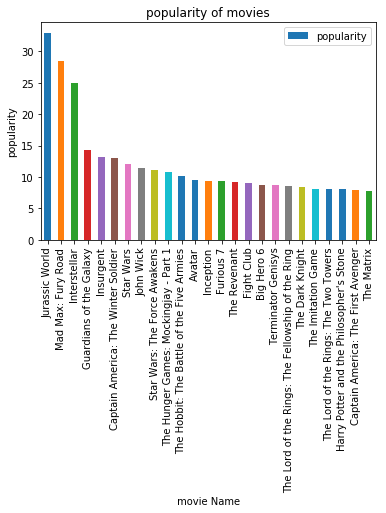

In [72]:
# get the hightest 25 movies with popularity with their id
movies = df[['original_title' , 'popularity']].sort_values(by='popularity', ascending=False).iloc[:25]
movies.plot(x='original_title',y='popularity',kind='bar')
plt.xlabel(' movie Name ')
plt.ylabel('popularity')
plt.title('popularity of movies')
plt.show()

we can see that jurassic world movie seems to have the biggest popularity then mad max

### Research Question 8  (How the runtime affects on the popularity ?)


Text(0,0.5,'popularity ')

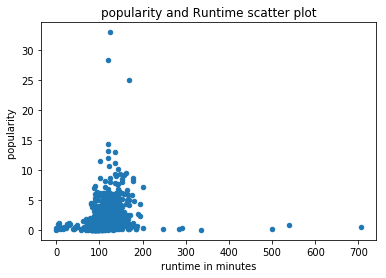

In [73]:
# extract the popularity and the runtime for each movie
lst = df[['popularity' , 'runtime']]
# plot the popularity based on the runtime of the movies
lst.plot(x='runtime' , y='popularity' , kind='scatter' , title='popularity and Runtime scatter plot')
plt.xlabel('runtime in minutes')
plt.ylabel('popularity ')

we see that movies that are too long or too short are not popular

### Research Question 9  (How the runtime affects on the revenue ?)


Text(0,0.5,'revenue in USD')

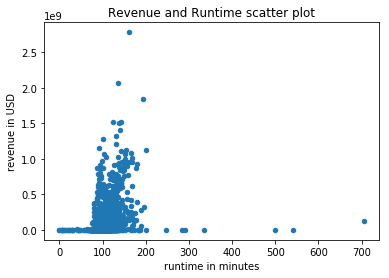

In [74]:
# extract the revenue and runtime of all movies
lst = df[['revenue' , 'runtime']]
# plot the revenue associated with the runtime of the movies
lst.plot(x='runtime' , y='revenue' , kind='scatter', title='Revenue and Runtime scatter plot')
plt.xlabel('runtime in minutes')
plt.ylabel('revenue in USD')

Most movies that their runtime between 90 min and 150 minute seem to gain more revenue

### Research Question 10  (what are the revenues of top 25 companies and which one gain the largest and lowest revenue between them ?)


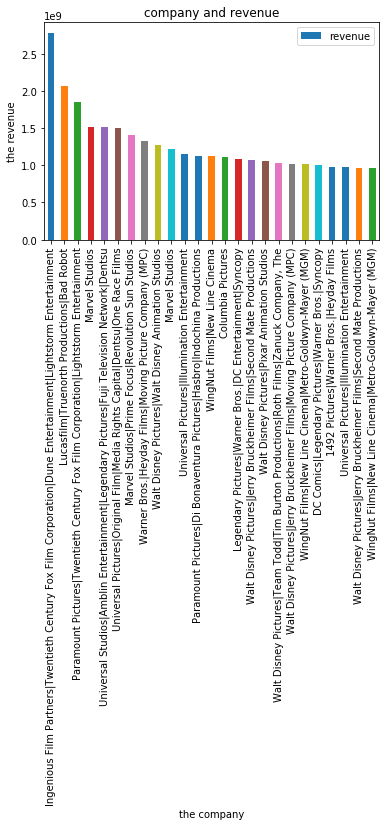

In [75]:
movies = df[['production_companies' , 'revenue']].sort_values(by='revenue', ascending=False).iloc[:25]
movies.plot(x='production_companies',y='revenue',kind='bar')
plt.xlabel('the company')
plt.ylabel('the revenue')
plt.title('company and revenue')
plt.show()

It's clear that the Ingenious Film partner company seems to be the most company that gain revenue

I can't draw the rest of the companies as the graph will be too big so I picked the top of them

In [76]:
max = movies['revenue'].max()
company = movies[movies['revenue'] == max]
print('The company that achieves the highest revenue is :')
print(company['production_companies'])
min = movies['revenue'].min()
company1 = movies[movies['revenue'] == min]
print('The company that achieves the lowest revenue is :')
print(company1['production_companies'])

The company that achieves the highest revenue is :
1386    Ingenious Film Partners|Twentieth Century Fox ...
Name: production_companies, dtype: object
The company that achieves the lowest revenue is :
5431    WingNut Films|New Line Cinema|Metro-Goldwyn-Ma...
Name: production_companies, dtype: object


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.



Conclusion

first I downloaded the dataset and after I explored it I posed some questions that I want to answer and then I started to wrangle data and checked for any errors in the data I removed duplicated and removed nulls and fixed data types
then I started to answer the questions I posed and I came up with these results

1 - which movie gain the highest popularity ?

    The Movie with highest popularity is : 'Jurassic World'

2 - which movie makes the largest and the movie with smallest revenue ?

    The film with the highest revenue is Avatar
    ************************************************
    The film with the lowest revenue is Survivor
    and 545 much more

3 - which genres achieve the hightest and lowest votes ?

    The genre that achieves the highest revenue is Action|Thriller|Science Fiction|Mystery|Adventure        
    ********************************************************
    The genre that achieves the lowest revenue is  Thriller|Horror and Music|Drama and more

4 - which movie achieves highest revenue according to revenue_adj ?

        The film with the highest revenue is Avatar also

5 - what are the best films that have an average vote above 8 ?
    
    the best films that have an average vote above 8 are Whiplash , Bill Cunningham New York , Fight Club,
    The Dark Knight , Kill Bill: The Whole Bloody Affair , The Godfather , Schindler's List

6 - what are the worst films that have an average vote below 4 ?

    102                    The Boy Next Door
    481                                Bound
    682                          Left Behind
    810                               Zodiac
    975                      Best Night Ever
    1205               Jersey Shore Massacre
    1289                           Treehouse
    1773    ZMD: Zombies of Mass Destruction
    2076             Nude Nuns With Big Guns
    2280          Mega Shark vs. Crocosaurus
    2325                        Mega Piranha
    3134                      Disaster Movie
    3489               Battle of Los Angeles
    4621                  Outpost: Black Sun
    4708               2-Headed Shark Attack
    4851                            Playback
    4859                          Foodfight!
    4868                       Among Friends
    5064                               Gigli
    5082                   House of the Dead
    5689                           Sharknado
    5978                           Nailbiter
    6315                          BloodRayne
    6404                      All About Anna
    6423                           Man-Thing
    7220        Superbabies: Baby Geniuses 2
    7482                I Know Who Killed Me
    8803                              Python
    
    
7 - what is popularity for first 25 movies ?
    
    explained in plot

8 - How the runtime affects on the popularity ?

    people tend to watch and like movies that are between 110 and 140 minutes
    and movies with 120 minutes seem to be the most popular
    
9 - How the runtime affects on the revenue ?
    
    movies that are between 90 minutes and 140 minutes gain the highest revenue

10 - which company achieves the highest and lowest revenue ?

    The company that achieves the highest revenue is : Lucasfilm|Truenorth Productions|Bad Robot
    The company that achieves the lowest revenue is : DNA Films|Universal Pictures International Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0